# Ordered Target Statistics
参考文献：Prokhorenkova, Liudmila, et al. "CatBoost: unbiased boosting with categorical features." arXiv preprint arXiv:1706.09516 (2017).


## サンプルデータ
「人口総数」を予測したいとして、「元号」をエンコードしたいとします。

In [1]:
import pandas as pd

X = pd.read_csv("../data/sample.csv")
TARGET_NAME = "人口総数"
FEATURE_NAME = "元号"
X.head()

,元号,和暦,西暦,人口総数,町名
0,大正,9.0,1920.0,394748,A町
1,大正,9.0,1920.0,31421,B町
2,大正,9.0,1920.0,226993,C町
3,大正,9.0,1920.0,253689,D町
4,大正,9.0,1920.0,288602,E町


## Ordered Target Statistics

```{hint}
- [category_encoders.cat_boost.CatBoostEncoder](http://contrib.scikit-learn.org/category_encoders/catboost.html)
- [sklearn.compose.make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html)
```

In [2]:
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.compose import make_column_transformer

c_ots = CatBoostEncoder()

y = X[TARGET_NAME]
X[f"{FEATURE_NAME}_ots"] = c_ots.fit_transform(X[FEATURE_NAME], y)

## 結果を確認する
カテゴリ変数の列が `CatBoostEncoder` でエンコードされていることを確認します。

In [3]:
X[[FEATURE_NAME, f"{FEATURE_NAME}_ots"]]

,元号,元号_ots
0,大正,109247.087755
1,大正,251997.543878
2,大正,178472.029252
3,大正,190602.271939
4,大正,203219.617551
...,...,...
975,平成,101664.388810
976,平成,101406.646760
977,平成,101126.513717
978,平成,100845.716013


## エンコード結果の分布を確認する

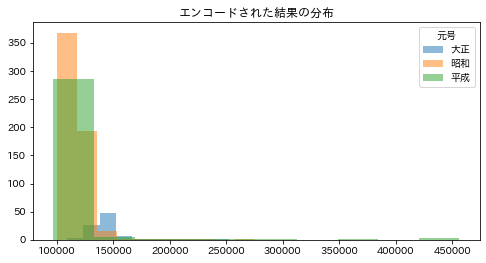

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 4))
for i, ci in enumerate(X[FEATURE_NAME].unique()):
    plt.hist(
        X.query(f"{FEATURE_NAME}=='{ci}'")[f"{FEATURE_NAME}_ots"], label=ci, alpha=0.5
    )

plt.title("エンコードされた結果の分布")
plt.legend(title=FEATURE_NAME)